In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.api.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Lade den MNIST-Datensatz
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filtere nur die Bilder mit der Ziffer "2"
X_2 = X_train[y_train == 2]

# Reshape für PCA (28x28 → 784 Features)
X_2_flat = X_2.reshape(X_2.shape[0], -1)

print(f"Anzahl der '2'-Bilder: {X_2.shape[0]}")


Anzahl der '2'-Bilder: 5958


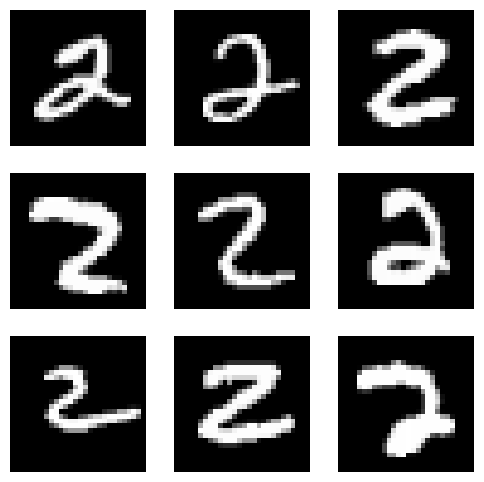

In [20]:
# Zeige die ersten 9 Bilder der Ziffer "2"
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_2[i], cmap='gray')
    ax.axis('off')
plt.show()


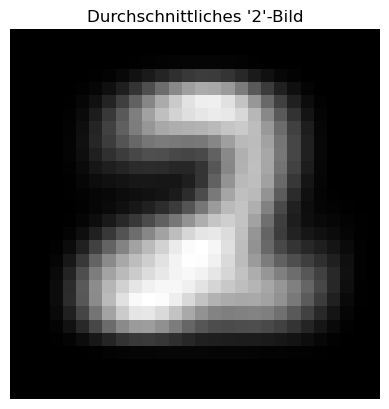

In [22]:
# Berechne den Durchschnitt aller Bilder der Ziffer "2"
mean_image = np.mean(X_2, axis=0)

# Visualisiere das Durchschnittsbild
plt.imshow(mean_image, cmap='gray')
plt.title("Durchschnittliches '2'-Bild")
plt.axis('off')
plt.show()


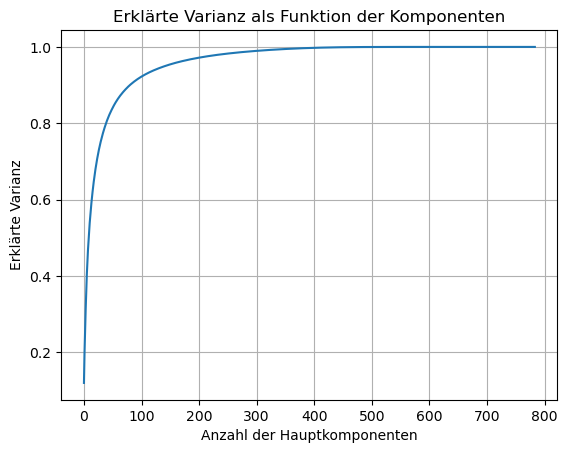

In [24]:
#Wende PCA an
pca = PCA().fit(X_2_flat)

# Erklärte Varianz visualisieren
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianz')
plt.title('Erklärte Varianz als Funktion der Komponenten')
plt.grid()
plt.show()


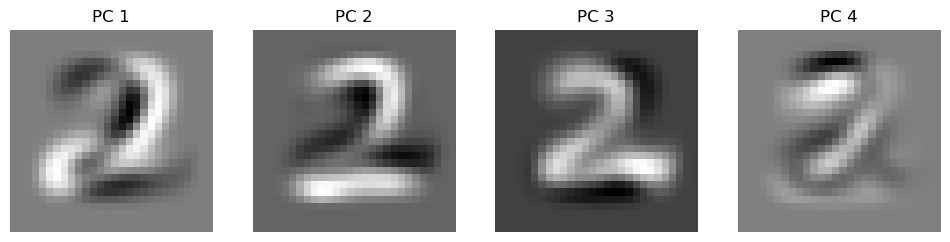

In [26]:
# Visualisiere die ersten 4 Hauptkomponenten
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    ax = axes[i]
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'PC {i+1}')
    ax.axis('off')
plt.show()


In [29]:
# Erstelle binäre Klassifikation (2 vs. Nicht-2)
y_binary = (y_train == 2).astype(int)  # 1 für "2", 0 für alle anderen

# Reshape gesamte MNIST-Daten für PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Wende PCA mit 50 Komponenten an
pca = PCA(n_components=50)
X_pca_train = pca.fit_transform(X_train_flat)
X_pca_test = pca.transform(X_test.reshape(X_test.shape[0], -1))

# Trainiere k-NN-Klassifikator
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_train, y_binary)

# Berechne die Klassifikationsgenauigkeit
y_pred = knn.predict(X_pca_test)
accuracy = accuracy_score((y_test == 2).astype(int), y_pred)
print(f"Genauigkeit des k-NN-Klassifikators: {accuracy:.4f}")


Genauigkeit des k-NN-Klassifikators: 0.9951


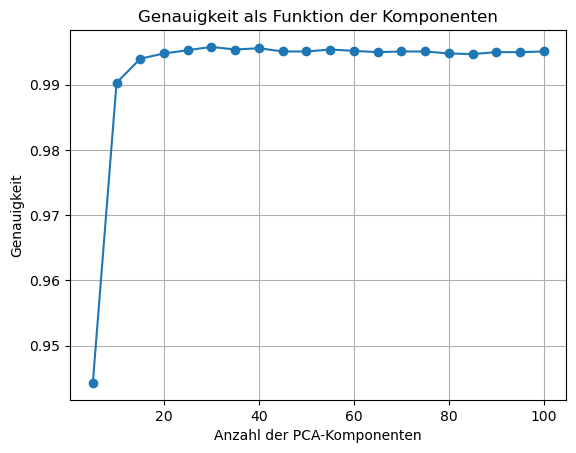

In [31]:
components_range = range(5, 101, 5)  # Teste 5 bis 100 PCA-Komponenten
accuracies = []

for n in components_range:
    pca = PCA(n_components=n)
    X_pca_train = pca.fit_transform(X_train_flat)
    X_pca_test = pca.transform(X_test.reshape(X_test.shape[0], -1))

    knn.fit(X_pca_train, y_binary)
    y_pred = knn.predict(X_pca_test)
    accuracies.append(accuracy_score((y_test == 2).astype(int), y_pred))

# 📈 Plot der Genauigkeit
plt.plot(components_range, accuracies, marker='o')
plt.xlabel('Anzahl der PCA-Komponenten')
plt.ylabel('Genauigkeit')
plt.title('Genauigkeit als Funktion der Komponenten')
plt.grid()
plt.show()


In [32]:
optimal_components = components_range[np.argmax(accuracies)]
print(f"Beste Anzahl an Hauptkomponenten: {optimal_components}")


Beste Anzahl an Hauptkomponenten: 30


In [33]:
# Erkläre den Zusammenhang
print("Das beste Ergebnis erhalten wir bei einer Anzahl an Hauptkomponenten, die eine hohe, aber nicht maximale erklärte Varianz liefert. Zu wenige Komponenten verlieren wichtige Informationen, zu viele enthalten unnötige Details.")


Das beste Ergebnis erhalten wir bei einer Anzahl an Hauptkomponenten, die eine hohe, aber nicht maximale erklärte Varianz liefert. Zu wenige Komponenten verlieren wichtige Informationen, zu viele enthalten unnötige Details.


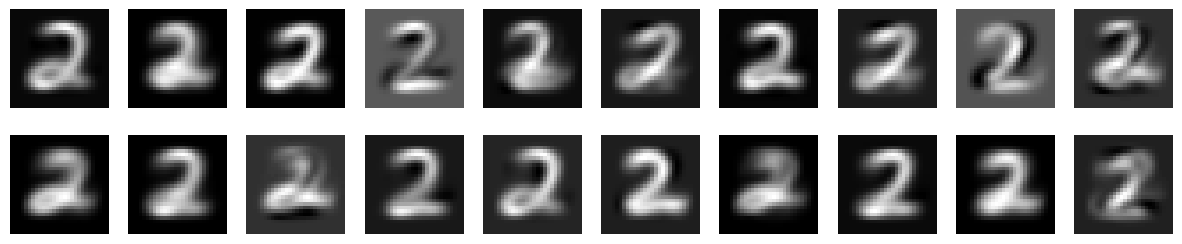

In [34]:
# Wähle 4 Hauptkomponenten für die Generierung
pca = PCA(n_components=4)
X_proj = pca.fit_transform(X_2_flat)

# 🎲 Generiere zufällige Faktoren basierend auf Verteilung der Projektionen
X_gen = (np.random.randn(20, 4) * np.std(X_proj, axis=0, keepdims=True)
         + np.mean(X_proj, axis=0, keepdims=True))

# 🔄 Rekonstruiere neue "2"-Bilder aus den generierten Faktoren
X_reconstructed = pca.inverse_transform(X_gen)

# 🎨 Visualisiere die neuen generierten Bilder
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()
